# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Введение в анализ данных!" </center>

# <center> Лабораторная работа №1. Обработка и первичный анализ данных </center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [493]:
import pandas as pd
import numpy as np
import warnings
import seaborn
import matplotlib.pyplot as plt
import matplotlib
import pylab
from tabulate import tabulate as tb
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline 
warnings.filterwarnings('ignore')

In [494]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [495]:
data = pd.read_csv("students_data.csv")
data.shape

(1044, 36)

In [496]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [497]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


<br>  

## Задания

**NB:** Обратите внимание, что часть студентов посещают оба курса и представлены в данных два раза. Из-за этого некоторые результаты анализа могут быть искажены. Имеет смысл выявить таких студентов заранее ([Задание 11](#task11)) и учитывать эту информацию при анализе.

### Задание 1  
  
 * Для каждого признака определите, к какому типу он относится.   
 * Проверьте значения признаков на наличие опечаток и ошибок, исправьте их.<br>
   __Note:__ Исправлять ошибки нужно программно, модифицировать руками исходный файл нельзя.
 * При необходимости, приведите признак к определенному вами типу.

### Задание 1.1
Для проверки выведем список всех признаков и распределим по кортежам в 3 категории. 
Приходится делать это вручную, смотря на описание признаков.

In [498]:
print(data.dtypes)
categoric = ("Subject", "school", "sex", "address","famsize" ,"Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup", "famsup",
              "paid", "activities", "nursery", "higher", "internet", "romantic", "cheating")
numberic = ('ID', 'age', 'failures', 'absences', 'G1', 'G2', 'G3')
sort_categoric = ("Medu", "Fedu", "traveltime", "studytime", "famrel", "freetime", "goout", "Dalc", "Walc", "health")

ID              int64
Subject        object
school         object
sex            object
age             int64
address        object
famsize        object
Pstatus        object
Medu           object
Fedu           object
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime      int64
studytime       int64
failures        int64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel        float64
freetime        int64
goout           int64
Dalc          float64
Walc          float64
health          int64
absences        int64
cheating       object
G1              int64
G2              int64
G3              int64
dtype: object


### Задание 1.2
Выведем уникальные значения для категориальных и упорядоченные категориальные. Найдем среди них "плохие" значения. Для числовых просто удостоверимся, что нет не числовых значений.

In [499]:
print("Sort Categorical Values:")
for value in sort_categoric:
    print(value, data[value].unique())
print()
print("Categorical Values:")
for value in categoric:
    print(value, data[value].unique())

Sort Categorical Values:
Medu ['3' '1' '2' '4' '0' 'o']
Fedu ['4' '2' '3' '1' 'o' '0']
traveltime [1 2 3 4]
studytime [1 2 4 3]
famrel [ 3.  5.  4.  1.  2. nan]
freetime [2 3 4 1 5]
goout [1 4 5 3 2]
Dalc [ 1.  3.  4.  2.  5. nan]
Walc [ 4.  3.  5.  1.  2. nan]
health [5 3 4 2 1]

Categorical Values:
Subject ['Por' 'Math']
school ['GP' 'MS']
sex ['F' 'M' 'm']
address ['U' 'R']
famsize ['GT3' 'LE3']
Pstatus ['A' 'T' 't']
Mjob ['services' 'other' 'health' 'at_home' 'teacher' 'at-home']
Fjob ['other' 'services' 'health' 'at-home' 'teacher' 'at_home']
reason ['course' 'home' 'reputation' 'other']
guardian ['father' 'mother' 'other' 'futher']
schoolsup ['no' 'yes']
famsup ['no' 'yes']
paid ['no' 'yes']
activities ['no' 'yes']
nursery ['yes' 'no']
higher ['yes' 'no']
internet ['yes' 'no']
romantic ['no' nan 'yes']
cheating [nan 'yes' 'no']


Как мы видим имеются значения с ошибками, исправим их
Пустые значения исправим в следующем задании

In [500]:
data.loc[data['Medu'] == 'o', 'Medu'] = '0'
data.loc[data['Fedu'] == 'o', 'Fedu'] = '0'
data.loc[data['sex'] == 'm', 'sex'] = 'M'
data.loc[data['Pstatus'] == 't', 'Pstatus'] = 'T'
data.loc[data['Mjob'] == 'at-home', 'Mjob'] = 'at_home'
data.loc[data['Fjob'] == 'at-home', 'Fjob'] = 'at_home'
data.loc[data['guardian'] == 'futher', 'guardian'] = 'father'

print("Sort Categorical Values:")
for value in sort_categoric:
    print(value, data[value].unique())
print()
print("Categorical Values:")
for value in categoric:
    print(value, data[value].unique())

Sort Categorical Values:
Medu ['3' '1' '2' '4' '0']
Fedu ['4' '2' '3' '1' '0']
traveltime [1 2 3 4]
studytime [1 2 4 3]
famrel [ 3.  5.  4.  1.  2. nan]
freetime [2 3 4 1 5]
goout [1 4 5 3 2]
Dalc [ 1.  3.  4.  2.  5. nan]
Walc [ 4.  3.  5.  1.  2. nan]
health [5 3 4 2 1]

Categorical Values:
Subject ['Por' 'Math']
school ['GP' 'MS']
sex ['F' 'M']
address ['U' 'R']
famsize ['GT3' 'LE3']
Pstatus ['A' 'T']
Mjob ['services' 'other' 'health' 'at_home' 'teacher']
Fjob ['other' 'services' 'health' 'at_home' 'teacher']
reason ['course' 'home' 'reputation' 'other']
guardian ['father' 'mother' 'other']
schoolsup ['no' 'yes']
famsup ['no' 'yes']
paid ['no' 'yes']
activities ['no' 'yes']
nursery ['yes' 'no']
higher ['yes' 'no']
internet ['yes' 'no']
romantic ['no' nan 'yes']
cheating [nan 'yes' 'no']


### Задание 1.3
Можно заметить, что некоторые значения имеют неправильный тип, исправим данный момент

In [501]:
data[['Medu', 'Fedu']] = data[['Medu', 'Fedu']].astype(np.int64)
print(data.dtypes)

ID              int64
Subject        object
school         object
sex            object
age             int64
address        object
famsize        object
Pstatus        object
Medu            int64
Fedu            int64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime      int64
studytime       int64
failures        int64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel        float64
freetime        int64
goout           int64
Dalc          float64
Walc          float64
health          int64
absences        int64
cheating       object
G1              int64
G2              int64
G3              int64
dtype: object


### Задание 2  
  
Проверьте, присутствуют ли в данных пропущенные значения. Сколько? В каких признаках?  
По каждому такому признаку предложите и обоснуйте, что делать с пропущенными значениями.

#### Выведем количество  пропущенных значений в каждом столбце

In [502]:
print(data.isnull().sum())

ID              0
Subject         0
school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic       10
famrel         10
freetime        0
goout           0
Dalc           10
Walc           10
health          0
absences        0
cheating      700
G1              0
G2              0
G3              0
dtype: int64


Как мы видим в столбце cheating наибольшее количество пропущенных значений, по этой причине сложно заменить пустые элементы средним значением. Следовательно просто удаляем этот столбец

In [503]:
data.drop(columns=["cheating"], inplace=True)

Теперь найдем средние значения для столбцов и заменим пустые ячейки

In [504]:
columns = data.columns.values.tolist()
empty_columns = list()
for value in columns:
    if data[value].isnull().sum() != 0:
        if(data[value].dtypes == 'object'):    
            data = data.fillna({value : data[value].value_counts().index[0]})
        else:
            data = data.fillna({value : data[value].median()})

print(data.isnull().sum())
print(data.dtypes)

ID            0
Subject       0
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
ID              int64
Subject        object
school         object
sex            object
age             int64
address        object
famsize        object
Pstatus        object
Medu            int64
Fedu            int64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime      int64
studytime       int64
failures        int64
schoolsup      object
famsup         object
paid     

### Задание 3  
  
Проанализируйте данные на наличие выбросов.   
Сколько наблюдений можно отнести к выбросам по каждому признаку? Сколько всего выбросов в данных?  
  
**Note:** Выбросы можно не удалять из данных. Это информацию можно учитывать в дальнейшем анализе и удалять выбросы при необходимости. 

#### Выведем количество  

In [505]:
def outliers(df=data):
    inf = dict()
    for column in df.columns:
        if df[column].dtypes != 'object' and column is not 'ID':
            box_plot = plt.boxplot(df[column], labels=[column])
            fliers = set(box_plot['fliers'][0].get_ydata())
            if (len(fliers)):
                inf[column] = fliers
    plt.close()
    return inf

pr = outliers().copy()
print("Outliers:")
for key, value in pr.items():
    print(str(key) + ": " + str(value) + " - number pf outliers " + str(len(value)))

Outliers:
age: {22} - number pf outliers 1
traveltime: {4} - number pf outliers 1
studytime: {4} - number pf outliers 1
failures: {1, 2, 3} - number pf outliers 3
famrel: {1.0, 2.0} - number pf outliers 2
freetime: {1} - number pf outliers 1
Dalc: {4.0, 5.0} - number pf outliers 2
absences: {16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 30, 32, 38, 40, 54, 56, 75} - number pf outliers 19
G1: {0} - number pf outliers 1
G2: {0} - number pf outliers 1
G3: {0, 1} - number pf outliers 2


In [506]:
#Также выполним кодирование для категориальных переменных (LabelEncoding)

def countable(df=data):
    all_categories = list(categoric)
    all_categories.remove("cheating")
    all_categories_dict = dict()
    for value in all_categories:
        all_categories_dict[value] = set(data[value].unique())
    for i in all_categories_dict:
        all_categories_dict[i] = (all_categories_dict[i], len(all_categories_dict[i]))
    return all_categories_dict

data_enc_label = data[[column for column in data.columns if data[column].dtypes == 'object']].copy()
categ = [column for column in data.columns if data[column].dtypes == 'object']
labelencoder = LabelEncoder()
for i in categ:
    data_enc_label[i] = labelencoder.fit_transform(data_enc[i])
data_enc_label

,Subject,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,1,0,0,1,0,0,3,2,0,0,0,0,0,0,1,1,1,0
1,1,0,0,1,0,1,2,2,0,1,0,0,0,1,0,1,1,0
2,1,0,1,1,1,1,1,3,0,1,0,0,0,0,0,1,1,0
3,1,1,1,1,0,1,2,3,1,0,0,0,0,1,1,1,1,0
4,1,0,0,1,0,1,0,2,1,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,0,0,0,0,1,3,3,3,2,0,1,1,1,1,1,1,1
1040,1,0,1,0,0,1,1,3,3,1,0,0,0,1,1,1,1,1
1041,1,1,0,0,1,1,0,2,0,0,0,1,0,0,1,1,0,0
1042,1,0,1,1,0,1,0,2,0,1,0,0,0,0,1,1,0,0


In [507]:
# One hot encoding
hot = OneHotEncoder(handle_unknown='ignore')
categories_data = countable(data[[column for column in data.columns if data[column].dtypes == 'object']].copy())
one_hot_df = pd.DataFrame(hot.fit_transform(data_enc_label[['Mjob', 'Fjob', 'guardian', 'reason']]).toarray())
one_hot_df.columns = [column + '_'+ str(list(categories_data[column][0])[i]) for column in ['Mjob', 'Fjob', 'guardian', 'reason']
                      for i in range(categories_data[column][1])]
for column in one_hot_df.columns:
     one_hot_df[column] = one_hot_df[column].apply(int, convert_dtype=True)
        
data_enc_label = data_enc_label.drop(['Mjob', 'Fjob', 'guardian', 'reason'], axis=1)
data_enc_label.columns = [column + '_'+ str(list(categories_data[column][0])[1]) for column in data_enc_label.columns]
data_object_encoded = data_labels_enc.join(ohenc_data)
encoded_df = data_enc_label.join(one_hot_df)
encoded_df

,Subject_Math,school_GP,sex_F,address_U,famsize_GT3,Pstatus_A,schoolsup_no,famsup_no,paid_no,activities_no,nursery_no,higher_no,internet_no,romantic_no,Mjob_health,Mjob_at_home,Mjob_services,Mjob_other,Mjob_teacher,Fjob_health,Fjob_at_home,Fjob_services,Fjob_other,Fjob_teacher,guardian_other,guardian_mother,guardian_father,reason_other,reason_home,reason_course,reason_reputation
0,1,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
1,1,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,1,0,1,1,1,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,1,1,1,1,0,1,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0
4,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,0,0,0,0,1,0,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
1040,1,0,1,0,0,1,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
1041,1,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
1042,1,0,1,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0


### Задание 4 
  
* Посчитайте описательные статистики для числовых и для категориальных признаков. 
* Сколько студентов посещают каждую из школ?  
* Сколько студентов посещают математику, сколько - португальский?  
* Студенты какого курса чаще заваливают экзамены?  
* Сколько в среднем времени в неделю уходит на учебу по каждому предмету?  
* На что чаще обращают внимание при выборе школы?

### Задание 4.1
Посчитайте описательные статистики для числовых и для категориальных признаков.

In [508]:
data.describe(include="all")

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044,1044,1044,1044.000000,1044,1044,1044,1044.000000,1044.000000,1044,1044,1044,1044,1044.000000,1044.000000,1044.000000,1044,1044,1044,1044,1044,1044,1044,1044,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
unique,NaN,2,2,2,NaN,2,2,2,NaN,NaN,5,5,4,3,NaN,NaN,NaN,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Por,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,course,mother,NaN,NaN,NaN,no,yes,no,no,yes,yes,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,649,772,591,NaN,759,738,923,NaN,NaN,399,584,430,728,NaN,NaN,NaN,925,640,824,528,835,955,827,674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,547057.190613,NaN,NaN,NaN,16.726054,NaN,NaN,NaN,2.603448,2.387931,NaN,NaN,NaN,NaN,1.522989,1.970307,0.264368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.936782,3.201149,3.156130,1.492337,2.288314,3.543103,4.434866,11.213602,11.246169,11.341954
std,263827.330362,NaN,NaN,NaN,1.239975,NaN,NaN,NaN,1.124907,1.099938,NaN,NaN,NaN,NaN,0.731727,0.834353,0.656142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.928833,1.031507,1.152575,0.911700,1.282008,1.424703,6.210017,2.983394,3.285071,3.864796
min,100097.000000,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,324017.500000,NaN,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,554339.500000,NaN,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,774486.000000,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000


### Задание 4.2
Сколько студентов посещают каждую из школ?

In [509]:
ms = len(data.loc[data['school'] == 'MS'])
gp = len(data.loc[data['school'] == 'GP'])
print(str(ms) + " посещают Mousinho da Silveira")
print(str(gp) + " посещают Gabriel Pereira")

272 посещают Mousinho da Silveira
772 посещают Gabriel Pereira


### Задание 4.3
Сколько студентов посещают математику, сколько - португальский?

In [510]:
math = len(data.loc[data['Subject'] == 'Math'])
port = len(data.loc[data['Subject'] == 'Por'])
print(str(math) + " посещают математику")
print(str(port) + " посещают португальский")

395 посещают математику
649 посещают португальский


### Задание 4.4
Студенты какого курса чаще заваливают экзамены?

In [511]:
math_percentage = len(data.loc[(data['failures'] != 0) & (data['Subject'] == 'Math')]) / len(data.loc[data['Subject'] == 'Math'])
port_percentage = len(data.loc[(data['failures'] != 0) & (data['Subject'] == 'Por')]) / len(data.loc[data['Subject'] == 'Por'])
if math_percentage > port_percentage:
    print("Студенты математическго курса завлаивают чаще" )
else:
    print("Студенты португальского курса завлаивают чаще" )

Студенты математическго курса завлаивают чаще


### Задание 4.5
Сколько в среднем времени в неделю уходит на учебу по каждому предмету?

In [512]:
mat_time = data.loc[data['Subject'] == 'Math', 'studytime'].median()
port_time = data.loc[data['Subject'] == 'Por', 'studytime'].median()
print(mat_time)
print(port_time)

2.0
2.0


На математику в среднем уходит от 2 до 5 часов в неделю

На португальский в среднем уходит от 2 до 5 часов в неделю

### Задание 4.6
На что чаще обращают внимание при выборе школы?

In [513]:
reason = data['reason'].value_counts().index[0]
print("Чаще всего внимание обращают внимание на: " + reason)

Чаще всего внимание обращают внимание на: course


### Задание 5  
  
Оцените распределение оценок (отдельно для `G1`, `G2` и `G3`). Сравните распределения для разных предметов - математики и португальского языка. Сделайте выводы.  
  
**Tip:** Для выполнения задания пригодятся графики плотности, гистограммы и боксплоты.

#### Оцените распределение оценок (отдельно для G1, G2 и G3)

<AxesSubplot:xlabel='G1', ylabel='Density'>

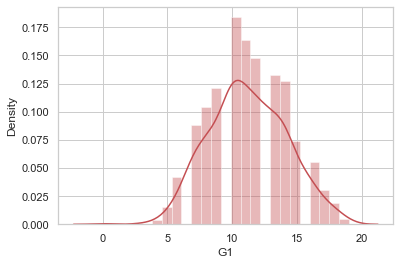

In [514]:
seaborn.distplot(data['G1'], color="r")
#plt.boxplot(data['G1'])
#seaborn.distplot(data['G2'], color="g")
#seaborn.distplot(data['G3'], color="w")

<AxesSubplot:xlabel='G2', ylabel='Density'>

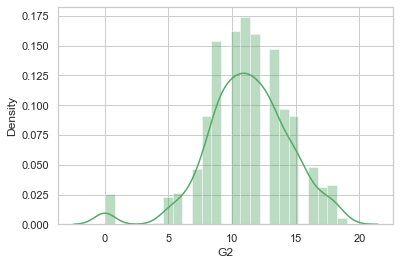

In [515]:
seaborn.distplot(data['G2'], color="g")

<AxesSubplot:xlabel='G3', ylabel='Density'>

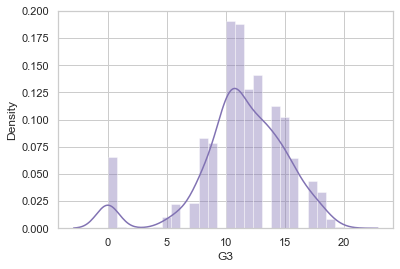

In [516]:
seaborn.distplot(data['G3'], color="m")

##### Вывод: Как мы видим, плотность распределения оценок примерно одинакова во всех полугодиях, даже в итоговых оценках средняя оценка чуть больше 10. Однако стоит отметить, что в итоговых оценках резко возрастает количество нулевых оценок.

#### Сравните распределения для разных предметов - математики и португальского языка.

In [517]:
math_estimation = data.loc[data['Subject']=='Math', ['G1', 'G2', 'G3']]
port_estimation = data.loc[data['Subject']=='Por', ['G1', 'G2', 'G3']]



### Распределение математики по всем полугодиям

<AxesSubplot:xlabel='G3', ylabel='Density'>

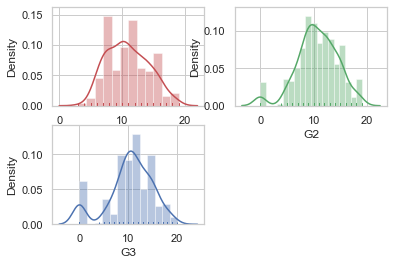

In [518]:
pylab.subplot (2, 2, 1)
seaborn.distplot(math_estimation['G1'], color='r', rug=True, hist=True)
pylab.subplot (2, 2, 2)
seaborn.distplot(math_estimation['G2'], color='g', rug=True, hist=True)
pylab.subplot (2, 2, 3)
seaborn.distplot(math_estimation['G3'], color='b', rug=True, hist=True)

### Распределение португальского языка по всем полугодиям

<AxesSubplot:xlabel='G3', ylabel='Density'>

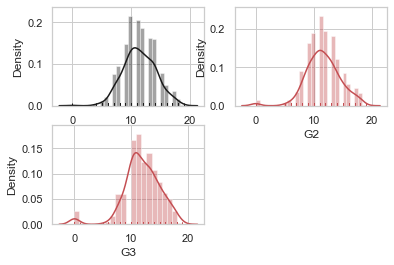

In [519]:
pylab.subplot (2, 2, 1)
seaborn.distplot(port_estimation['G1'], color='k', rug=True, hist=True)
pylab.subplot (2, 2, 2)
seaborn.distplot(port_estimation['G2'], color='r', rug=True, hist=True)
pylab.subplot (2, 2, 3)
seaborn.distplot(port_estimation['G3'], color='r', rug=True, hist=True)

### Гистограммы по математике для всех полугодий

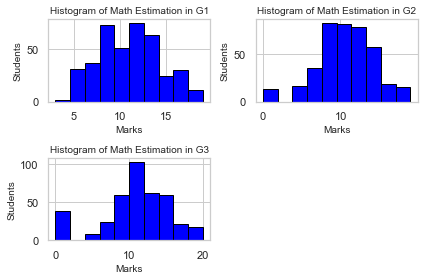

In [520]:
half_years = ['G1', 'G2', 'G3']

for i in range(3):
    ax = plt.subplot(2, 2, i + 1)
    ax.hist(math_estimation[half_years[i]],
             color = 'blue', edgecolor = 'black')
    
    ax.set_title('Histogram of Math Estimation in ' + half_years[i], size = 10)
    ax.set_xlabel('Marks', size = 10)
    ax.set_ylabel('Students', size= 10)

plt.tight_layout()
plt.show()


### Гистограммы по португальскому для всех полугодий

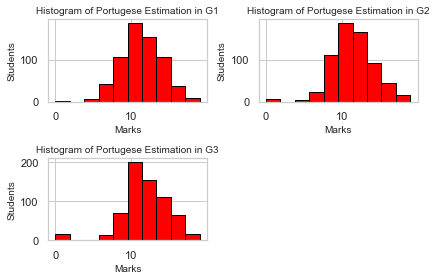

In [521]:
for i in range(3):
    ax = plt.subplot(2, 2, i + 1)
    ax.hist(port_estimation[half_years[i]],
             color = 'red', edgecolor = 'black')
    
    ax.set_title('Histogram of Portugese Estimation in ' + half_years[i], size = 10)
    ax.set_xlabel('Marks', size = 10)
    ax.set_ylabel('Students', size= 10)

plt.tight_layout()
plt.show()

### Плотность оценок по математике

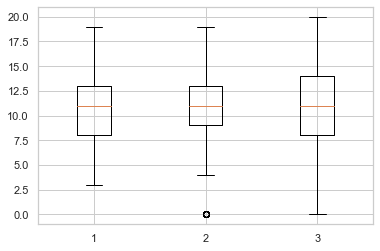

In [522]:
plt.boxplot([math_estimation['G1'], math_estimation['G2'], math_estimation['G3']])
plt.show()

### Плотность оценок по португальскому

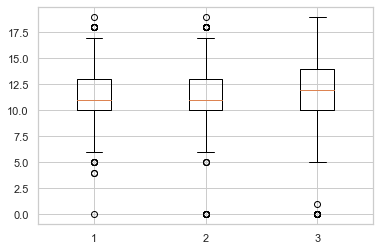

In [523]:
plt.boxplot([port_estimation['G1'], port_estimation['G2'], port_estimation['G3']])
plt.show()

## Выводы по 5-му заданию

1)Исходя из распределения математики и португальского, можно сделать вывод о том, что количество нулевых оценок по математике было намного больше, чем у студентов с курсом португальского языка.

2)Кроме того, также исходя из плотности распределения, можно сказать, что в математике большая склонность к плохим оценкам, то есть ближе к 7.5, у португальского языка такое явление не наблюдается

3)Гистограммы показали, что количество студентов на португальском курсе гораздо больше, чем в математическом

4)Итоговая оценка (G3) также выше у португальского языка, также из гистограмм можно увидеть, что среди математиков получивших 0 за итоговую оценку горздо больше, чем студентов изучающих португальский. Примерно 45 математиков против около 10 людей из курса португальского

5)Boxplots явно показали, что плотность оценок по португальскому находится в районе 11.5, а итоговая оценка вообще за 12. Кроме того, у этого курса не такой сильный разброс оценок

6)Исходя из боксплота математического курса, можно сразу сказать, что он имеет более широкий разброс оценок. Также можно увидеть, что средняя оценка во всех периодах примерна равна.

### Задание 6 
  
Оцените попарные зависимости числовых признаков.  
Рассчитайте и провизуализируйте матрицу корреляций. Дайте содержательный комментарий.

In [524]:
list_numb = list(numberic)
list_numb = list_numb[1:]
cov_matrix = data[list_numb].corr()
cov_matrix

,age,failures,absences,G1,G2,G3
age,1.000000,0.282364,0.153196,-0.124121,-0.119475,-0.125282
failures,0.282364,1.000000,0.099998,-0.374175,-0.377172,-0.383145
absences,0.153196,0.099998,1.000000,-0.092425,-0.089332,-0.045671
G1,-0.124121,-0.374175,-0.092425,1.000000,0.858739,0.809142
G2,-0.119475,-0.377172,-0.089332,0.858739,1.000000,0.910743
G3,-0.125282,-0.383145,-0.045671,0.809142,0.910743,1.000000


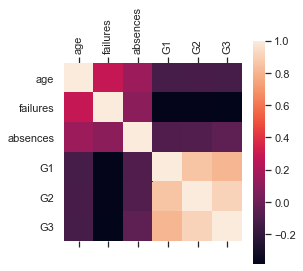

In [525]:
plt.matshow(cov_matrix)
seaborn.heatmap(cov_matrix, annot=False)
plt.show()

### Вывод:
1)Сразу заметна зависимость между оценками, так как если выше G1 и G2, то и результат G3 выше

2)Соотношение между возрастом и неудачами очень слабая

3)Так же из корреляции между возрастом и оценками, можно заметить, что возраст не сильно влияет на оценки

4)Исследуя соотношение отметок и отказов можно увидеть отрицательную корреляцию. Из этого следует, что уменьшение количества отказов означает увеличение значение оценок

### Задание 7  
  
Оцените попарные зависимости нечисловых (категориальных) признаков, дайте содержательный комментарий. 

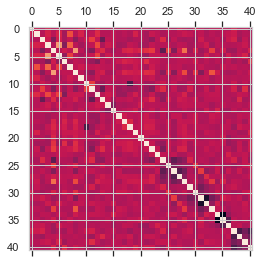

In [526]:
ordered_categoric = set(data.columns) - set(categoric) - set(numberic)
buf_data = data[ordered_categoric].copy()
cat_data = buf_data.join(encoded_df)
cov_matrix = cat_data.corr()
plt.matshow(cov_matrix)
plt.show()

In [527]:
cov_matrix

,health,freetime,traveltime,Walc,Medu,Dalc,studytime,goout,Fedu,famrel,Subject_Math,school_GP,sex_F,address_U,famsize_GT3,Pstatus_A,schoolsup_no,famsup_no,paid_no,activities_no,nursery_no,higher_no,internet_no,romantic_no,Mjob_health,Mjob_at_home,Mjob_services,Mjob_other,Mjob_teacher,Fjob_health,Fjob_at_home,Fjob_services,Fjob_other,Fjob_teacher,guardian_other,guardian_mother,guardian_father,reason_other,reason_home,reason_course,reason_reputation
health,1.000000,0.081517,-0.029002,0.105262,-0.013254,0.063366,-0.063044,-0.013736,0.034288,0.107842,-0.006205,-0.053214,0.141113,-0.010895,-0.009147,0.016213,0.000785,0.022668,-0.009043,0.017165,-0.005869,0.008036,-0.041685,-0.001333,-0.078445,0.036168,-0.034189,0.075564,0.017106,-0.036065,0.089110,0.029574,-0.062321,0.018647,0.011183,-0.003484,-0.012256,0.116804,-0.015782,0.007388,-0.124371
freetime,0.081517,1.000000,-0.007403,0.128659,0.001054,0.145392,-0.094429,0.323556,0.002142,0.136372,-0.025949,0.026008,0.181603,-0.009744,-0.007249,0.038714,-0.026126,0.006227,-0.034747,0.128601,-0.013837,-0.086824,0.061016,0.014712,-0.047825,-0.015520,-0.017702,0.017525,0.072738,0.045318,-0.039445,0.038416,-0.051199,0.003558,-0.032711,0.003161,0.048511,0.082123,-0.064393,-0.008310,-0.023762
traveltime,-0.029002,-0.007403,1.000000,0.084402,-0.238181,0.110928,-0.081328,0.049740,-0.196328,-0.010556,0.079881,0.258834,0.042508,-0.343803,0.031550,0.033883,-0.033940,-0.026117,-0.083679,-0.025834,-0.018641,-0.081857,-0.169485,0.012305,0.170171,-0.106540,0.038616,-0.068560,-0.083252,-0.052228,-0.090635,0.099122,-0.031258,-0.021649,0.024526,-0.061961,0.070983,0.128033,-0.112132,0.040928,-0.063705
Walc,0.105262,0.128659,0.084402,1.000000,-0.031006,0.626551,-0.227727,0.399705,0.015796,-0.093377,-0.006344,0.026531,0.302245,-0.045020,0.089953,0.046438,-0.094815,-0.071398,0.045036,0.004829,-0.083583,-0.086569,0.043410,-0.016684,0.000129,0.023224,-0.046208,0.028632,0.012495,-0.081838,-0.037794,0.011480,0.094615,-0.088912,0.014044,-0.001453,-0.020656,-0.015150,0.013197,0.070843,-0.046549
Medu,-0.013254,0.001054,-0.238181,-0.031006,1.000000,-0.001096,0.090616,0.025614,0.642063,0.014524,-0.101246,-0.235114,0.109387,0.179720,-0.025556,-0.077133,-0.023618,0.143063,0.161349,0.116924,0.149287,0.206551,0.249728,-0.007615,-0.387814,0.258135,-0.231026,0.104984,0.452952,-0.091603,0.128323,-0.115679,-0.019372,0.260111,-0.043620,0.097703,-0.103730,-0.116806,0.024313,-0.022861,0.126800
Dalc,0.063366,0.145392,0.110928,0.626551,-0.001096,1.000000,-0.159742,0.253424,-0.000379,-0.073034,0.014030,0.067255,0.273531,-0.065319,0.077001,0.015016,-0.025098,-0.023946,0.037851,-0.010609,-0.081700,-0.113608,0.041025,0.047983,-0.014899,-0.075688,-0.003120,0.045862,0.025456,-0.029019,-0.017240,-0.062511,0.098913,-0.013059,0.035723,-0.078755,0.082680,-0.031405,0.041371,0.134013,-0.101511
studytime,-0.063044,-0.094429,-0.081328,-0.227727,0.090616,-0.159742,1.000000,-0.072941,0.033458,0.007473,-0.060934,-0.133255,-0.239972,0.037480,-0.035109,0.005049,0.070598,0.143858,0.105704,0.078847,0.056817,0.186556,0.049695,0.035986,-0.018424,-0.015221,-0.007451,0.019401,0.020386,0.004087,0.107722,-0.038541,0.011951,-0.033607,0.011457,-0.020958,0.018770,-0.084553,-0.019542,-0.097277,0.187202
goout,-0.013736,0.323556,0.049740,0.399705,0.025614,0.253424,-0.072941,1.000000,0.030075,0.083563,0.032011,0.037000,0.062530,0.030790,0.005889,0.020498,-0.051227,0.005252,-0.012943,0.072236,0.013779,-0.062837,0.083766,0.003879,-0.036958,0.046969,0.006338,0.031040,-0.043558,-0.023500,0.006843,0.043242,-0.021470,-0.031480,-0.064810,0.056714,0.005225,0.028489,-0.012108,-0.002354,-0.018991
Fedu,0.034288,0.002142,-0.196328,0.015796,0.642063,-0.000379,0.033458,0.030075,1.000000,0.013705,-0.094795,-0.187611,0.070786,0.124303,-0.047290,-0.049156,0.032450,0.153342,0.118897,0.093800,0.104681,0.191956,0.170012,-0.037402,-0.188731,0.133393,-0.200426,0.079390,0.307594,-0.084975,0.202267,-0.230861,0.024698,0.348978,0.094286,-0.046298,-0.072834,-0.059851,0.011945,-0.025451,0.0753

### Вывод:
1)Исходя из таблицы, можно сделать, что связь между категориальным переменными не сильная

2)Исходя из Medu и Fedu, люди выбирают друг друга с подходящим уровнем образования

3)Исходя из Walc и Dalc, мы понимаем, что они связаны, это логично, так как они относятся к алкоголю

4)Также исходя из Medu, is_Mjob_teacher женщины с образованием становятся учителями

### Задание  8  
  
* Оцените, есть ли разница в употреблении алкоголя между парнями и девушками. Кто пьет больше?
* Оцените связь употребления алкоголя с признаками: address, Pstatus, higher, romantic, freetime. 
* Оцените связь употребления алкоголя с уровнем образования опекуна (для случаев, где это известно).
* Сравните употребление алкоголя для 50 лучших учеников и 50 худших (по `G3`). Выполните сравнение отдельно для каждого предмета (`Math` и `Por`). Дайте содержательный комментарий.  
  
**Tip:** для выполнения задания пригодятся боксплоты и гистограммы. 

#### 1)Оцените, есть ли разница в употреблении алкоголя между парнями и девушками. Кто пьет больше?

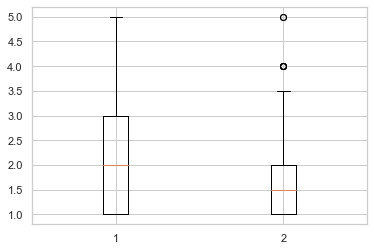

In [528]:
alc_average_df = data.copy()
alc_average_df['alc_average'] = alc_average_df[['Walc', 'Dalc']].sum(axis=1)
alc_average_df['alc_average'] = alc_average_df['alc_average'].div(2)
plt.boxplot([alc_average_df.loc[alc_average_df['sex']=='M', 'alc_average'], 
              alc_average_df.loc[alc_average_df['sex']=='F', 'alc_average']])
plt.show()

In [529]:
print("Среднее количество выпивки мужского пола: " + str(alc_average_df.loc[alc_average_df['sex']=='M', 'alc_average'].median()))
print("Среднее количество выпивки женского пола: " + str(alc_average_df.loc[alc_average_df['sex']=='F', 'alc_average'].median()))

Среднее количество выпивки мужского пола: 2.0
Среднее количество выпивки женского пола: 1.5


#### Как мы видим, разница между употреблением алкоголя между парнями имеется, хотя не слишком большая. В итоге, больше пьют парни

#### 2)Оцените связь употребления алкоголя с признаками: address, Pstatus, higher, romantic, freetime.

<AxesSubplot:xlabel='alc_average', ylabel='freetime'>

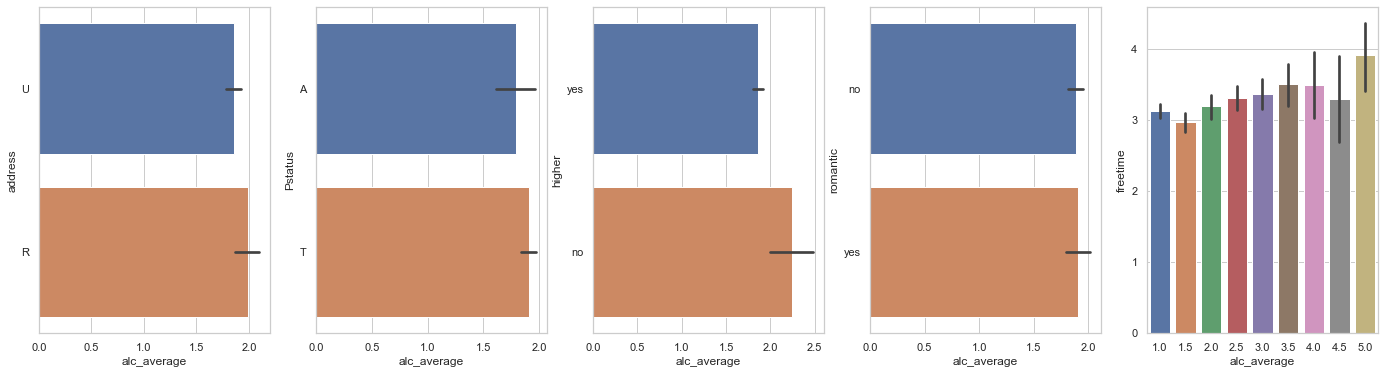

In [530]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (24, 6))
seaborn.barplot(data=alc_average_df, x='alc_average', y='address', estimator=np.mean, ax=ax1)
seaborn.barplot(data=alc_average_df, x='alc_average', y='Pstatus', estimator=np.mean, ax=ax2)
seaborn.barplot(data=alc_average_df, x='alc_average', y='higher', estimator=np.mean, ax=ax3)
seaborn.barplot(data=alc_average_df, x='alc_average', y='romantic', estimator=np.mean, ax=ax4)
seaborn.barplot(data=alc_average_df, x='alc_average', y='freetime', estimator=np.mean, ax=ax5)

### Выводы:
1)Студенты, которые живут за городом употребляют больше алкоголя

2)Студенты, у которых родители живут отдельно, употребляют больше алкоголя (логично)

3)Студенты, которые решили для себя не идти получать высшее образование, употребляют больше алкоголя и намного больше

4)Как мы видим, что наличие отношений не особо влияет на употребление алкоголя, но те, кто стоит в отношених, все же немного больше употребляют

5)Видно, что люди, которые имеют больше свободного времени, больше употребляют алкоголь

#### 3)Оцените связь употребления алкоголя с уровнем образования опекуна (для случаев, где это известно).

<AxesSubplot:xlabel='Fedu', ylabel='alc_average'>

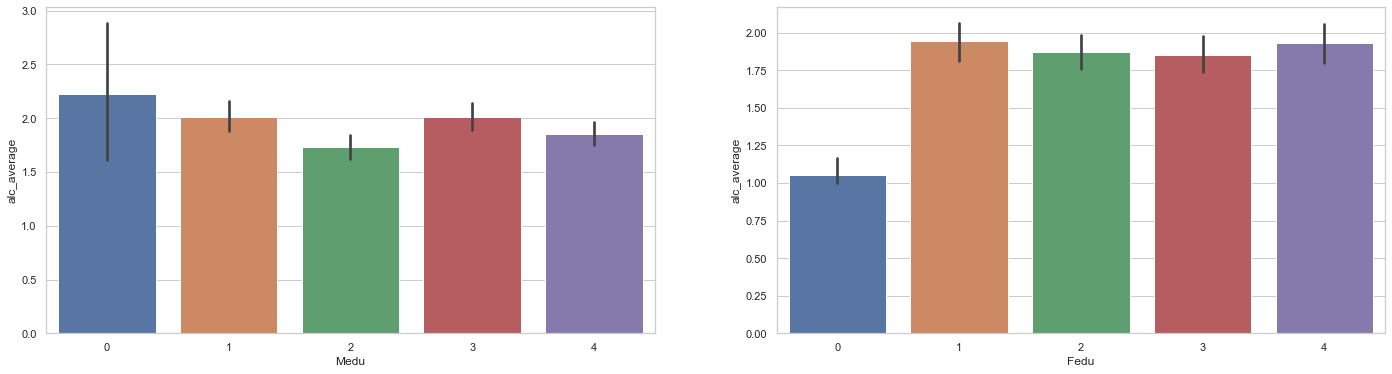

In [531]:
father = alc_average_df.loc[alc_average_df['guardian'] == 'father', ['alc_average', 'Fedu']]
mother = alc_average_df.loc[alc_average_df['guardian'] == 'mother', ['alc_average', 'Medu']]

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (24, 6))
seaborn.barplot(data=alc_average_df, x='Medu', y='alc_average', estimator=np.mean, ax=ax1)
seaborn.barplot(data=alc_average_df, x='Fedu', y='alc_average', estimator=np.mean, ax=ax2)

### Вывод:
1)Видно, что если опекуном является мать, и у нее нет образованию, употребление алкоголя в среднем больше, если же опекун - отец, обратная ситуация

2)В остальных случаях, если опекуном является отец, то уровень образования не влияет на употребление алкоголя, так как значения примерно одинаковые

3)Также, если опекуном является мать, и она закончила только 5 и 9 классы, то уровень употребления алкоголя низкий.

#### Сравните употребление алкоголя для 50 лучших учеников и 50 худших (по G3). Выполните сравнение отдельно для каждого предмета (Math и Por). Дайте содержательный комментарий.

In [532]:
students_math_worst = alc_average_df[alc_average_df['Subject'] == 'Math'].sort_values(by='G3')[:50]['alc_average'].mean()
students_port_worst = alc_average_df[alc_average_df['Subject'] == 'Por'].sort_values(by='G3')[:50]['alc_average'].mean()
students_math_best = alc_average_df[alc_average_df['Subject'] == 'Math'].sort_values(by='G3')[-50:]['alc_average'].mean()
students_port_best = alc_average_df[alc_average_df['Subject'] == 'Por'].sort_values(by='G3')[-50:]['alc_average'].mean()

print("Сравнение употребление алкоголя лучших студентов: ")
print("Курсы математики " + str(students_math_best) + " <-> " + " курсы португальского " + str(students_port_best))
print("Сравнение употребление алкоголя худших студентов: ")
print("Курсы математики " + str(students_math_worst) + " <-> " + " курсы португальского " + str(students_port_worst))

Сравнение употребление алкоголя лучших студентов: 
Курсы математики 1.57 <->  курсы португальского 1.58
Сравнение употребление алкоголя худших студентов: 
Курсы математики 1.81 <->  курсы португальского 2.29


### Вывод:
1)Худшие студенты курса по португальскому языку пьют намного больше, чем худшие студенты математического курса

2)На курсах португальского и математики лучшие студенты пьют примерно одинаково и при этом меньше любых худших студентов

3)На курсах португальского разница между худшими или лучшими наибольшая

### Задание 9     
  
Оцените зависимость итоговой оценки от следующих признаков: 
  
* Пола
* Времени в пути от дома до школы
* Наличия дополнительной помощи в учебе (от членов семьи или вообще)
* Посещения платных дополнительных занятий
* Наличия интернета
* Наличия романтических отношений
* Употребления алкоголя  

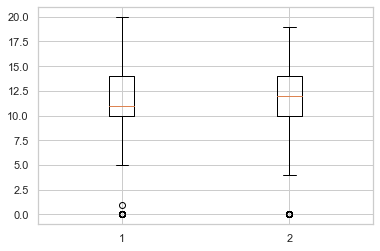

In [533]:
# Зависимость итоговой оценки от пола
seaborn.set_theme(style="whitegrid")
plt.boxplot([data.loc[data['sex']=='M', 'G3'], data.loc[data['sex']=='F', 'G3']])
plt.show()

Девушки имеют более хорошую среднюю оценку

In [534]:
#Другие зависимости
comp = ['traveltime', 'has_help', 'paid', 'internet', 'romantic', 'alc_mean']


### Задание 10  
  
Добавьте в данные новый признак - итоговая оценка по 4-х балльной шкале:  

* Отлично: 18 <= `G3` <= 20
* Хорошо: 14 <= `G3` <= 17
* Удовлетворительно: 8 <= `G3` <= 13
* Неудовлетворительно: `G3` < 8  
  
Оцените распределение нового признака в зависимости от признака `reason` (причина выбора школы). Дайте содержательный комментарий. 

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G3_4points
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,15,13,14,4
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,17,18,17,4
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,9,8,10,3
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,14,15,16,4
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,no,4.0,3,2,1.0,4.0,5,2,12,13,13,3


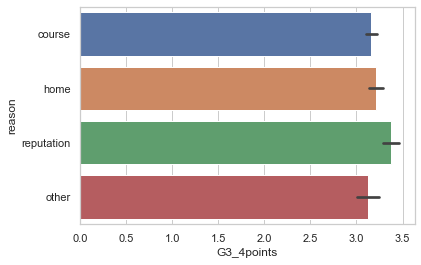

In [535]:
def G4(gr):
    return {
    gr <  8  : 2,
    8  <= gr <= 13: 3,
    14 <= gr <= 17: 4,
    18 <= gr <= 20: 5
    }[1]
data['G3_4points'] = data.loc[:, 'G3'].map(G4)
seaborn.barplot(data=data, y="reason", x="G3_4points")
data.head(5)

<AxesSubplot:xlabel='reason', ylabel='G3_4points'>

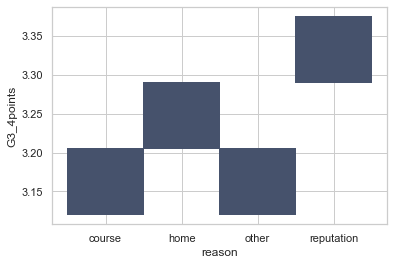

In [536]:
temp = data[["G3_4points", "reason"]]
sns.histplot(data=temp.groupby("reason").mean(), x="reason", y="G3_4points")

### Вывод:
1)Как видно из barplot и histplot средняя оценка находится в районе 3.35 - 3.45

2)Также стоит отметить, что итоговая оценка лучше у тех студентов, кто выбирал школу по ее репутации

3)Самая низкая оценка у тех, кто выбирал школу по другим причинам.


### Задание  11 <a id="task11"></a>  
  
Часть из представленных в данных студентов посещали оба курса - `Math` и `Por`.  
* Предложите способ идентификации студентов и определите тех, кто посещал оба курса. Сколько таких студентов?  
* Для этих студентов сравните оценки по двум предметам, дайте комментарий.  
  
**Note:** Столбец `ID` является уникальным идентификатором наблюдения, но не студента. Он будет уникален для каждой строки.

In [537]:
features = ['school', 'sex', 'age', 'address', 'school', 'reason', 'traveltime',
                     'famsize', 'Pstatus', 'Medu', 'Fedu', 
                     'Mjob', 'Fjob', 'reason', 'guardian', 'nursery', 
                     'higher', 'internet', 'romantic', 'famrel', 'goout',
                     'Dalc', 'Walc', 'health']

dupl = data[data.duplicated(features, keep='first')] 
print('Two courses students: ', len(dupl))
print("Portugal mean: ", dupl.loc[dupl["Subject"] == "Por"]["G3"].mean())
print("Mathematic mean: ", dupl.loc[dupl["Subject"] == "Math"]["G3"].mean())

Two courses students:  359
Portugal mean:  12.26923076923077
Mathematic mean:  10.299435028248588


### Вывод
1)Оба курса посещают 357 студентов

2)По португальскому языку средняя оценка выше чем у математического курса


### Задание 12  
  
Предложите простую модель для определения (предсказания) итоговой оценки студента по 4-х балльной системе. Оцените точность предложенной модели. 

In [538]:
df_learning = data.drop(columns=['ID', 'G1', 'G2', 'G3', 'G3_4points'])
objects = list(categoric + sort_categoric)
objects.remove('cheating')
df_learning = df_learning.drop(columns=objects)
df_learning = df_learning.join(encoded_df)
x = df_learning
y = data['G3_4points']

sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


#DecisionTree
print("\nDecisionTreeClassifier:")
DTC = DecisionTreeClassifier(random_state=4)
DTC.fit(X_train, y_train)
pred_dec = DTC.predict(X_test)

print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))



DecisionTreeClassifier:
              precision    recall  f1-score   support

           2       0.14      0.05      0.08        19
           3       0.63      0.78      0.70       130
           4       0.32      0.23      0.27        56
           5       0.00      0.00      0.00         4

    accuracy                           0.56       209
   macro avg       0.27      0.27      0.26       209
weighted avg       0.49      0.56      0.51       209

[[  1  14   4   0]
 [  4 102  24   0]
 [  2  41  13   0]
 [  0   4   0   0]]


In [539]:
#Data Scale
scale = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

#RFC
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print("RandomForestClassifier:")
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

RandomForestClassifier:
              precision    recall  f1-score   support

           2       0.20      0.06      0.09        17
           3       0.65      0.88      0.75       130
           4       0.52      0.22      0.31        59
           5       0.00      0.00      0.00         3

    accuracy                           0.62       209
   macro avg       0.34      0.29      0.29       209
weighted avg       0.56      0.62      0.56       209

[[  1  15   1   0]
 [  4 115  10   1]
 [  0  46  13   0]
 [  0   2   1   0]]


### Вывод:
1)В качестве простых моделей я решил использовать инструменты sklearn

2)Как и ожидалось RFC показал более хороший результат чем DTC (0.63 VS 0.59)

3)Однако возможно случаи когда, DTC лучше чем RFC, так как тестовые данные выбираются случайным образом

4)Конечно, для того, чтобы модель показывала более точные результаты, датасет должен быть намного больше 


### Задание * (бонусное)  
  
Дополнительное исследование данных и выводы положительно скажутся на оценке. 

In [ ]:
# your code here